In [104]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import keras

from keras.models import model_from_json

import numpy as np

%matplotlib inline

## Import data

In [105]:
df = pd.read_csv('../../databases/A3_formatted_dataset.csv')
df.keys()

Index(['C', 'Mn', 'Si', 'Cr', 'Ni', 'A3'], dtype='object')

In [106]:
x =  df.copy().drop('A3', axis=1)

## The model

In [107]:
# Define scaler for compositions only
scaler_comp = MinMaxScaler(feature_range=[-1, 1])
scaler_comp.fit(df.loc[:,['C','Mn','Si','Cr','Ni']])

# Define scaler for A3 temperature only
scaler_A3 = MinMaxScaler(feature_range=[-1, 1])
scaler_A3.fit(df.loc[:,['A3']])

MinMaxScaler(copy=True, feature_range=[-1, 1])

In [108]:
# load json and create model
json_file = open('models/model0.001_6.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights('models/model0.001_6.h5')

In [109]:
# Xnorm: normalized X
xnorm = x.copy()
xnorm.loc[:,:] = scaler_comp.transform(x)

In [110]:
# predicted values
y_norm = model.predict(xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

## Empirical

In [111]:
def A3_Andrews(C=0, Ni=0, Mn=0, Si=0, Cr=0):
    return 910 - 203*C**.5 + 44.7*Si - 15.2*Ni - 30.0*Mn + 11.0*Cr

In [112]:
A3_empirical = A3_Andrews(df['C'], df['Ni'],
                          df['Mn'], df['Si'], df['Cr'])

## Plot

In [113]:
y_list = map(lambda x: x[0], y)
A3_NN = pd.Series(y_list)

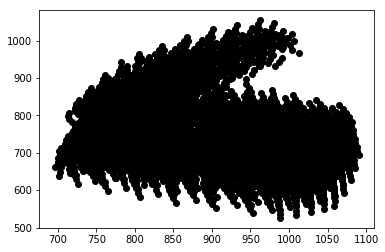

In [118]:
fig, ax = plt.subplots()
plt.plot(A3_NN, A3_empirical, 'ko')

## R2

In [100]:
y_bar = df['A3'].mean()

In [101]:
SQ_tot = np.sum((df['A3'] - y_bar)**2)
SQ_tot

74237445.79365405

In [102]:
SQ_res = np.sum((df['A3'] - A3_empirical)**2)
SQ_res

262144277.0218677

In [103]:
r2 = 1 - (SQ_res/SQ_tot)
r2

-2.5311597027530848